In [1]:
#Read the table of earthquakes from https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900 using *beautifulsoup* and load to a pandas dataframe.

#Data cleaning tasks include:
#1. Replace empty strings with NaN
#2. Remove the footnotes from the 'Other Source Deaths' column
#3. Convert Magnitude to a numeric
#4. Create a new column ('deaths') that evaluates the four total-death columns ('PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths') and populates the new column with the highest value.
#5. Explore the data in terms of when and where earthquakes occurred and how severe they were (magnitude, deaths, secondary effects).

#Feel free to add data after 9/23/2011, but understand that it is not required.
#Add any supplemental data you'd like in order to explore ideas related to earthquake occurrence and effects.
#hi 

In [2]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
% matplotlib inline

from bs4 import BeautifulSoup as BS
import urllib.request
import pandas as pd
import numpy as np

In [3]:
request = urllib.request.Request('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

In [4]:
result = urllib.request.urlopen(request)
resulttext = result.read()
earthquakesoup = BS(resulttext, 'html.parser')
earthquakesoup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of deadly earthquakes since 1900 - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":810533305,"wgRevisionId":810533305,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 2017","Wikipedia pages needi

In [5]:
request = urllib.request.Request('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

In [6]:
print(earthquakesoup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of deadly earthquakes since 1900 - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":810533305,"wgRevisionId":810533305,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 20

In [7]:
print(earthquakesoup.title)

<title>List of deadly earthquakes since 1900 - Wikipedia</title>


In [8]:
len(earthquakesoup.find_all('table'))

6

In [9]:
len(earthquakesoup.find_all('table', class_="sortable wikitable"))

1

In [10]:
table1 = earthquakesoup.find_all('table', class_=['sortable', 'wikitable', 'jquery-tablesorter'])
type(table1)

bs4.element.ResultSet

In [11]:
#convert the "Set" to "Tag" to be able to access the elemnts in the table
table2 = table1[0]
type(table2)

bs4.element.Tag

In [12]:
#find specific elemnts with a specific Tags <th>, <td> etc
table_header = table2.find_all("th")
type(table_header)

bs4.element.ResultSet

In [13]:
#find specific elemnts with a specific Tags <th>, <td> etc
table_header = table2.find_all("th")
type(table_header)

bs4.element.ResultSet

In [14]:
#so we have a lot of information with the th as the text, color width we just need the text so we are going to get rid of all 
#except the text
#list comprehension
header = [th.text for th in table_header]
type(header)

list

In [15]:
print(header)

['Origin (UTC)', 'Present-day country and link to Wikipedia article', 'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects', 'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Other Source Deaths']


In [16]:
row = []
for tr in table2.find_all("tr")[1:]:
    table_rows = [td.text for td in tr.find_all("td")]
    row.append(table_rows)   
    

In [17]:
type(row)

list

In [18]:
len(row)

1340

In [19]:
#now there are two list one header and one for the rows so we need to put them together
#convert it to dataframe
#rows are data and the column are assigned under the header
earthquakes = pd.DataFrame(row, columns = header)
earthquakes

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
1,1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,
4,1901-03-31 07:11,Bulgaria,43.400,28.700,,6.4 Muk,,,,4,,
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,,,,,
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,,,,1,,
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,,,,1,,
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,,,,86,,
9,1902-03-09 07:46,Turkey,40.700,33.600,,5.5 Muk,,,,4,,


In [20]:
countries_df = gpd.read_file('data/countries.geojson')
countries_df.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,POLYGON ((-69.99693762899992 12.57758209800004...
1,Afghanistan,AFG,"POLYGON ((71.04980228700009 38.40866445000009,..."
2,Angola,AGO,(POLYGON ((11.73751945100014 -16.6925779829998...
3,Anguilla,AIA,(POLYGON ((-63.03766842399995 18.2129580750000...
4,Albania,ALB,"POLYGON ((19.74776574700007 42.57890085900007,..."


In [21]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1340 non-null object
Long                                                 1340 non-null object
Depth (km)                                           1340 non-null object
Magnitude                                            1340 non-null object
Secondary Effects                                    1340 non-null object
PDE Shaking Deaths                                   1340 non-null object
PDE Total Deaths                                     1340 non-null object
Utsu Total Deaths                                    1340 non-null object
EM-DAT Total Deaths                                  1340 non-null object
Other Source Deaths                                  1338 non-null object
dtype

In [22]:
#replace the empty string with naN
#df.replace(r'\s+',np.nan,regex=True)
#replace 
earthquakes.replace("",np.nan,inplace=True) 
earthquakes.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN


In [23]:
#removing footnotes from other source deaths
earthquakes['Other Source Deaths'].value_counts()
#there are mixed values so we want to find them

1                                      3
111+                                   1
295                                    1
231000*[13] 283000*[14] 227898*[15]    1
3500                                   1
521[19]                                1
601 (as of October 30, 2011)           1
189                                    1
68                                     1
79                                     1
34                                     1
42                                     1
33[8]                                  1
26271[11] 26000[12]                    1
200                                    1
150+                                   1
8000+                                  1
380                                    1
41                                     1
1404                                   1
215                                    1
60[16]                                 1
15894[20]                              1
120                                    1
222,517[17]     

In [24]:
earthquakes[earthquakes['Other Source Deaths'].str.contains('231000', na=True)]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4,NaN,NaN


In [25]:
earthquakes[earthquakes['Other Source Deaths'].str.contains('231000', na=False)]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1238,2004-12-26 00:58,Indonesia (see 2004 Indian Ocean earthquake),3.287,95.972,30,9.1 Mw,"T,L",NaN,297200,NaN,NaN,231000*[13] 283000*[14] 227898*[15]


In [26]:
# removing the footnotes and commas between numbers in [Other Source Deaths]
regA="\[\d+]|\+|\s\(.*|\*"
earthquakes['Other Source Deaths']=earthquakes['Other Source Deaths'].str.replace(regA,"")
regB="\,"
earthquakes['Other Source Deaths']=earthquakes['Other Source Deaths'].str.replace(regB,"")

In [27]:
earthquakes['Other Source Deaths'].value_counts()

1                       3
231000 283000 227898    1
26271 26000             1
380                     1
150                     1
3500                    1
1500                    1
189                     1
68                      1
79                      1
222517                  1
34                      1
42                      1
164                     1
200                     1
111                     1
601                     1
295                     1
41                      1
521                     1
215                     1
8000                    1
15894                   1
120                     1
33                      1
46                      1
45000                   1
2698                    1
2489                    1
2041                    1
181                     1
1115                    1
1404                    1
60                      1
105000                  1
Name: Other Source Deaths, dtype: int64

In [28]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null object
PDE Total Deaths                                     750 non-null object
Utsu Total Deaths                                    1027 non-null object
EM-DAT Total Deaths                                  560 non-null object
Other Source Deaths                                  37 non-null object
dtypes: obj

In [29]:
earthquakes.head(1)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#converting nan to 0
#'PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths'
#df['column'] = df['column'].replace(np.nan, 0)

earthquakes['PDE Total Deaths'] = earthquakes['PDE Total Deaths'].replace(np.nan, 0)
earthquakes['Utsu Total Deaths'] = earthquakes['Utsu Total Deaths'].replace(np.nan, 0)
earthquakes['PDE Shaking Deaths'] = earthquakes['PDE Shaking Deaths'].replace(np.nan, 0)
earthquakes['EM-DAT Total Deaths'] = earthquakes['EM-DAT Total Deaths'].replace(np.nan, 0)
earthquakes['Other Source Deaths'] = earthquakes['Other Source Deaths'].replace(np.nan, 0)

In [31]:
#converting the non null to numeric
earthquakes['PDE Total Deaths'] = pd.to_numeric(earthquakes['PDE Total Deaths'])
earthquakes['Utsu Total Deaths'] = pd.to_numeric(earthquakes['Utsu Total Deaths'])
earthquakes['PDE Shaking Deaths'] = pd.to_numeric(earthquakes['PDE Shaking Deaths'])
#earthquakes['EM-DAT Total Deaths'] = pd.to_numeric(earthquakes['EM-DAT Total Deaths'])
#earthquakes['Other Source Deaths'] = pd.to_numeric(earthquakes['Other Source Deaths'])

In [32]:
#Unable to parse string "10[7]|" at position 439
#when trying to convert EM-DAT Total Deaths
#earthquakes['EM-DAT Total Deaths'] = pd.to_numeric(earthquakes['EM-DAT Total Deaths'])

In [33]:
earthquakes.iloc[439]

Origin (UTC)                                                                  1966-04-25 23:22
Present-day country and link to Wikipedia article    Uzbekistan (see 1966 Tashkent earthquake)
Lat                                                                                        NaN
Long                                                                                       NaN
Depth (km)                                                                                 NaN
Magnitude                                                                                 5 ML
Secondary Effects                                                                          NaN
PDE Shaking Deaths                                                                           0
PDE Total Deaths                                                                             0
Utsu Total Deaths                                                                            0
EM-DAT Total Deaths                               

In [34]:
# removing the footnotes and commas between numbers in [EM-DAT Total Deaths]
regA="\[\d+]|\+|\s\(.*|\*\|"
earthquakes['EM-DAT Total Deaths']=earthquakes['EM-DAT Total Deaths'].str.replace(regA,"")
regB="\|"
earthquakes['EM-DAT Total Deaths']=earthquakes['EM-DAT Total Deaths'].str.replace(regB,"")

In [35]:
earthquakes.iloc[439]

Origin (UTC)                                                                  1966-04-25 23:22
Present-day country and link to Wikipedia article    Uzbekistan (see 1966 Tashkent earthquake)
Lat                                                                                        NaN
Long                                                                                       NaN
Depth (km)                                                                                 NaN
Magnitude                                                                                 5 ML
Secondary Effects                                                                          NaN
PDE Shaking Deaths                                                                           0
PDE Total Deaths                                                                             0
Utsu Total Deaths                                                                            0
EM-DAT Total Deaths                               

In [36]:
#retry the pd.numeric code
earthquakes['EM-DAT Total Deaths'] = pd.to_numeric(earthquakes['EM-DAT Total Deaths'])

In [37]:
earthquakes['EM-DAT Total Deaths']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10       2000.0
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24      20000.0
25          NaN
26          NaN
27       2500.0
28          NaN
29        400.0
         ...   
1310        NaN
1311        NaN
1312        2.0
1313       13.0
1314        NaN
1315        NaN
1316        NaN
1317        NaN
1318        NaN
1319        NaN
1320        NaN
1321        NaN
1322        NaN
1323        NaN
1324        NaN
1325        NaN
1326        NaN
1327        NaN
1328        NaN
1329        NaN
1330        NaN
1331        NaN
1332        NaN
1333        NaN
1334        NaN
1335        NaN
1336        NaN
1337        NaN
1338        NaN
1339        NaN
Name: EM-DAT Total Death

In [38]:
earthquakes[earthquakes['EM-DAT Total Deaths'].isnull()]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,0,0,0,NaN,0
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,0,0,140,NaN,0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,0,0,0,NaN,0
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,0,0,0,NaN,0
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,0,0,4,NaN,0
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,0,0,0,NaN,0
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,0,0,1,NaN,0
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,0,0,1,NaN,0
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,0,0,86,NaN,0
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,0,0,4,NaN,0


In [39]:
earthquakes['EM-DAT Total Deaths'] = earthquakes['EM-DAT Total Deaths'].replace(np.nan, 0)
earthquakes[earthquakes['EM-DAT Total Deaths'].isnull()]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths


In [40]:
#Unable to parse string "26271 26000" at position 1206
#when trying to convert the Other Source Deaths using
#earthquakes['Other Source Deaths'] = pd.to_numeric(earthquakes['Other Source Deaths'])

In [41]:
earthquakes.iloc[1206]

Origin (UTC)                                                       2003-12-26 01:56
Present-day country and link to Wikipedia article    Iran (see 2003 Bam earthquake)
Lat                                                                          28.950
Long                                                                         58.268
Depth (km)                                                                        6
Magnitude                                                                    6.6 Mw
Secondary Effects                                                                 L
PDE Shaking Deaths                                                            31000
PDE Total Deaths                                                              31000
Utsu Total Deaths                                                                 0
EM-DAT Total Deaths                                                           26796
Other Source Deaths                                                     2627

In [42]:
len(earthquakes.columns)

12

In [43]:
earthquakes.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths'],
      dtype='object')

In [44]:
earthquakes.iloc[1206, 11]

'26271 26000'

In [45]:
earthquakes.iloc[1206, 11] = '26271'

In [46]:
earthquakes.iloc[1206, 11]

'26271'

In [47]:
earthquakes.iloc[1206]

Origin (UTC)                                                       2003-12-26 01:56
Present-day country and link to Wikipedia article    Iran (see 2003 Bam earthquake)
Lat                                                                          28.950
Long                                                                         58.268
Depth (km)                                                                        6
Magnitude                                                                    6.6 Mw
Secondary Effects                                                                 L
PDE Shaking Deaths                                                            31000
PDE Total Deaths                                                              31000
Utsu Total Deaths                                                                 0
EM-DAT Total Deaths                                                           26796
Other Source Deaths                                                         

In [48]:
#retry the pd.numeric code
#earthquakes['Other Source Deaths'] = pd.to_numeric(earthquakes['Other Source Deaths'])

In [49]:
#Unable to parse string "231000 283000 227898" at position 1238 so will replace the three values with the highest value

earthquakes.iloc[1238, 11] = '283000'

In [50]:
earthquakes.iloc[1238]

Origin (UTC)                                                                     2004-12-26 00:58
Present-day country and link to Wikipedia article    Indonesia (see 2004 Indian Ocean earthquake)
Lat                                                                                         3.287
Long                                                                                       95.972
Depth (km)                                                                                     30
Magnitude                                                                                  9.1 Mw
Secondary Effects                                                                             T,L
PDE Shaking Deaths                                                                              0
PDE Total Deaths                                                                           297200
Utsu Total Deaths                                                                               0
EM-DAT Total Deaths 

In [51]:
#retry the pd.numeric code
earthquakes['Other Source Deaths'] = pd.to_numeric(earthquakes['Other Source Deaths'])

In [52]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   1340 non-null int64
PDE Total Deaths                                     1340 non-null int64
Utsu Total Deaths                                    1340 non-null int64
EM-DAT Total Deaths                                  1340 non-null float64
Other Source Deaths                                  1340 non-null int64
dtypes: f

In [53]:
earthquakes['Present-day country and link to Wikipedia article']

0                                                  Japan
1                                                 Turkey
2                                              Venezuela
3                                                  China
4                                               Bulgaria
5                                                  Japan
6              New Zealand (see 1901 Cheviot earthquake)
7                                                  Japan
8                                             Azerbaijan
9                                                 Turkey
10             Guatemala (see 1902 Guatemala earthquake)
11                                                 China
12                                                 China
13                                             Australia
14                                            Uzbekistan
15                                     Judea and Samaria
16                Turkey (see 1903 Manzikert earthquake)
17                             

In [54]:
EQ = earthquakes
print(EQ.head())

       Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long Depth (km) Magnitude Secondary Effects  PDE Shaking Deaths  \
0  141.100          5  7.0 MJMA               NaN                   0   
1   43.100        NaN   5.9 Muk               NaN                   0   
2  -66.000          0    7.7 Mw               NaN                   0   
3  100.100          0    6.5 Ms               NaN                   0   
4   28.700        NaN   6.4 Muk               NaN                   0   

   PDE Total Deaths  Utsu Total Deaths  EM-DAT Total Deaths  \
0          

In [55]:
# removing the wikilinks from the country coulmn
regB="\[\d+]|\+|\s\(.*|\*|\|"
EQ['Present-day country and link to Wikipedia article']=EQ['Present-day country and link to Wikipedia article'].str.replace(regB,"")


In [56]:
EQ['Present-day country and link to Wikipedia article']

0                   Japan
1                  Turkey
2               Venezuela
3                   China
4                Bulgaria
5                   Japan
6             New Zealand
7                   Japan
8              Azerbaijan
9                  Turkey
10              Guatemala
11                  China
12                  China
13              Australia
14             Uzbekistan
15      Judea and Samaria
16                 Turkey
17                 Turkey
18                 Greece
19                   Iran
20                 Taiwan
21                 Greece
22                  China
23                 Taiwan
24                  India
25                Albania
26                  Japan
27                  Italy
28                 Greece
29                Ecuador
              ...        
1310                China
1311              Algeria
1312               Greece
1313                Japan
1314                China
1315               Greece
1316                China
1317        

In [57]:
EQ.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths'],
      dtype='object')

In [58]:
EQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   1340 non-null int64
PDE Total Deaths                                     1340 non-null int64
Utsu Total Deaths                                    1340 non-null int64
EM-DAT Total Deaths                                  1340 non-null float64
Other Source Deaths                                  1340 non-null int64
dtypes: f

In [59]:
EQ['Magnitude']

0          7.0 MJMA
1           5.9 Muk
2            7.7 Mw
3            6.5 Ms
4           6.4 Muk
5            7.2 Mw
6            6.8 Ms
7            6.9 Ms
8           6.9 Muk
9           5.5 Muk
10           7.5 Mw
11           6.7 Ms
12           7.7 Mw
13           6.0 ML
14          6.4 Muk
15          5.7 Muk
16           7.0 Ms
17          5.8 Muk
18          8.3 Muk
19          6.5 Muk
20          6.0 Muk
21          6.2 Muk
22           6.8 Ms
23          6.3 Muk
24           7.8 Mw
25          6.6 Muk
26           7.0 mb
27           6.8 Ms
28           6.8 Ms
29          8.8 Muk
           ...     
1310         6.1 Mw
1311         5.5 Mw
1312         6.4 Mw
1313         6.9 Mw
1314         4.8 mb
1315         6.4 Mw
1316         5.9 Ms
1317         5.7 Mw
1318         6.9 Mw
1319         6.4 Mw
1320         6.4 Mw
1321         6.1 Mw
1322         6.2 Mw
1323         5.7 Mw
1324         6.4 Mw
1325         7.0 Mw
1326         8.1 Mw
1327         7.6 Mw
1328         7.0 Mw


In [60]:
#use the regular expression to remove [18] from 1329
#regD="\[\d+]|\+|\s\(.*|\*|\|\,"
#EQ['Magnitude']=EQ['Magnitude'].str.replace(regD,"")
EQ['Magnitude'].iloc[1329]

'8.8 Mw [18]'

In [61]:
#Grab DataFrame rows where column has certain values has a null value
EQ[EQ.Magnitude.isnull()]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
104,1921-08-14,Eritrea,15.61,39.445,NaN,NaN,NaN,0,0,0,0.0,0


In [62]:
#replace the null value in magnitude
EQ['Magnitude'] = EQ['Magnitude'].replace(np.nan, 0.0)

#find the nan values in Magnitude
EQ['Magnitude'].isnull().value_counts()


False    1340
Name: Magnitude, dtype: int64

In [63]:
#drop the row 104 which has null value and replacing is making it float
EQ2 = EQ.drop([104])
print(EQ2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1339 non-null object
Present-day country and link to Wikipedia article    1339 non-null object
Lat                                                  1325 non-null object
Long                                                 1325 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   1339 non-null int64
PDE Total Deaths                                     1339 non-null int64
Utsu Total Deaths                                    1339 non-null int64
EM-DAT Total Deaths                                  1339 non-null float64
Other Source Deaths                                  1339 non-null int64
dtypes: f

In [64]:
EQ2['Magnitude']

0          7.0 MJMA
1           5.9 Muk
2            7.7 Mw
3            6.5 Ms
4           6.4 Muk
5            7.2 Mw
6            6.8 Ms
7            6.9 Ms
8           6.9 Muk
9           5.5 Muk
10           7.5 Mw
11           6.7 Ms
12           7.7 Mw
13           6.0 ML
14          6.4 Muk
15          5.7 Muk
16           7.0 Ms
17          5.8 Muk
18          8.3 Muk
19          6.5 Muk
20          6.0 Muk
21          6.2 Muk
22           6.8 Ms
23          6.3 Muk
24           7.8 Mw
25          6.6 Muk
26           7.0 mb
27           6.8 Ms
28           6.8 Ms
29          8.8 Muk
           ...     
1310         6.1 Mw
1311         5.5 Mw
1312         6.4 Mw
1313         6.9 Mw
1314         4.8 mb
1315         6.4 Mw
1316         5.9 Ms
1317         5.7 Mw
1318         6.9 Mw
1319         6.4 Mw
1320         6.4 Mw
1321         6.1 Mw
1322         6.2 Mw
1323         5.7 Mw
1324         6.4 Mw
1325         7.0 Mw
1326         8.1 Mw
1327         7.6 Mw
1328         7.0 Mw


In [65]:
EQ2.iloc[1328]

Origin (UTC)                                         2010-02-27 06:34
Present-day country and link to Wikipedia article               Chile
Lat                                                           -35.846
Long                                                          -72.719
Depth (km)                                                         35
Magnitude                                                 8.8 Mw [18]
Secondary Effects                                                   T
PDE Shaking Deaths                                                  0
PDE Total Deaths                                                    0
Utsu Total Deaths                                                   0
EM-DAT Total Deaths                                                 0
Other Source Deaths                                               521
Name: 1329, dtype: object

In [66]:
## working in the mag column trying to convert to numeric and 
#break it into a value coulmn and units column to group by th units
Mag = EQ2['Magnitude'].str.split(" ")
# print(Mag)

values = [row[0] for row in Mag]

def returnEmpty(row):
    if len(row) < 2:
        return ''
    
    val= row [1]
    if val =="Mb":
        val = "mb"
    return val

units = [returnEmpty(row) for row in Mag]

#print(units)
EQ2['Mag_Value'] = values
EQ2['Mag_Units'] = units
EQ2.head()


#print(Mag)
#EQ['Mag_Value'] = values
#EQ['Mag_Units'] = units
#EQ.head()


#got the error trying to fix it

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Mag_Value,Mag_Units
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,0,0,0,0.0,0,7.0,MJMA
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,0,0,140,0.0,0,5.9,Muk
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,0,0,0,0.0,0,7.7,Mw
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,0,0,0,0.0,0,6.5,Ms
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,0,0,4,0.0,0,6.4,Muk


magnitude
The magnitude is a number that characterizes the relative size of an earthquake. Magnitude is based on measurement of the maximum motion recorded by a seismograph. Several scales have been defined, but the most commonly used are (1) local magnitude (ML), commonly referred to as "Richter magnitude", (2) surface-wave magnitude (Ms), (3) body-wave magnitude (Mb), and (4) moment magnitude (Mw). Scales 1-3 have limited range and applicability and do not satisfactorily measure the size of the largest earthquakes. The moment magnitude (Mw) scale, based on the concept of seismic moment, is uniformly applicable to all sizes of earthquakes but is more difficult to compute than the other types. All magnitude scales should yield approximately the same value for any given earthquake.

Where the details of how a magnitude has been determined are unknown catalogs will specify the scale as unknown (variously Unk, Ukn, or UK). In such cases the magnitude is considered generic and approximate.

In Japan, for shallow (depth < 60 km) earthquakes within 600 km, the Japanese Meteorological Agency calculates a magnitude labeled MJMA, MJMA, or MJ. (These should not be confused with moment magnitudes JMA calculates, which are labeled Mw(JMA) or M(JMA).) The magnitudes are based (as typical with local scales) on the maximum amplitude of the ground motion; they agree "rather well" with the seismic moment magnitude Mw in the range of 4.5 to 7.5, but underestimate larger magnitudes.



In [67]:
#Mw(moment magnitude), ML(local magnitude/Richter magnitude), Md(Duration/coda magnitude), Ms(Surface ), 
#mb(body wave magnitude, where mb refers to short period and mB refers to long period), 
#Muk(methods of magnitide measurments are unkown)
EQ2['Mag_Units'].value_counts()

Mw      822
Muk     201
mb      145
Ms      122
ML       31
MJMA      8
Md        5
Lg        4
          1
Name: Mag_Units, dtype: int64

In [68]:
#creating a geometry coulmn using lat and long before braeking the Mag units in sub df
EQ2['Lat'] = EQ2['Lat'].replace("?", np.nan)
EQ2['Long'] = EQ2['Long'].replace("??", np.nan)
EQ2['Long'] = pd.to_numeric(EQ2['Long'])
EQ2['Lat'] = pd.to_numeric(EQ2['Lat'])

In [69]:
#create the geometry coulmn in the EQ2 df using lat ln
geometry = [Point(xy) for xy in zip (EQ2.Long, EQ2.Lat)]
#set a cordinate ref system crs
crs = {"init": "epsg:4326"}
EQ2['Geometry'] = geometry
#earthquakes_gdf = gpd.GeoDataFrame(earthquakes, crs=crs, geometry=geometry)
EQ2.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Mag_Value,Mag_Units,Geometry
0,1900-05-11 17:23,Japan,38.7,141.1,5,7.0 MJMA,NaN,0,0,0,0.0,0,7.0,MJMA,POINT (141.1 38.7)
1,1900-07-12 06:25,Turkey,40.3,43.1,NaN,5.9 Muk,NaN,0,0,140,0.0,0,5.9,Muk,POINT (43.1 40.3)
2,1900-10-29 09:11,Venezuela,11.0,-66.0,0,7.7 Mw,NaN,0,0,0,0.0,0,7.7,Mw,POINT (-66 11)
3,1901-02-15 00:00,China,26.0,100.1,0,6.5 Ms,NaN,0,0,0,0.0,0,6.5,Ms,POINT (100.1 26)
4,1901-03-31 07:11,Bulgaria,43.4,28.7,NaN,6.4 Muk,NaN,0,0,4,0.0,0,6.4,Muk,POINT (28.7 43.4)


In [70]:
#create a Max_Deaths column with the maximum deaths from the five coulmns with daeths count
EQ2['Max_Deaths'] = EQ2[['PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths', 
                         'EM-DAT Total Deaths', 'Other Source Deaths']].max(axis=1)
EQ2

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Mag_Value,Mag_Units,Geometry,Max_Deaths
0,1900-05-11 17:23,Japan,38.7000,141.1000,5,7.0 MJMA,NaN,0,0,0,0.0,0,7.0,MJMA,POINT (141.1 38.7),0.0
1,1900-07-12 06:25,Turkey,40.3000,43.1000,NaN,5.9 Muk,NaN,0,0,140,0.0,0,5.9,Muk,POINT (43.1 40.3),140.0
2,1900-10-29 09:11,Venezuela,11.0000,-66.0000,0,7.7 Mw,NaN,0,0,0,0.0,0,7.7,Mw,POINT (-66 11),0.0
3,1901-02-15 00:00,China,26.0000,100.1000,0,6.5 Ms,NaN,0,0,0,0.0,0,6.5,Ms,POINT (100.1 26),0.0
4,1901-03-31 07:11,Bulgaria,43.4000,28.7000,NaN,6.4 Muk,NaN,0,0,4,0.0,0,6.4,Muk,POINT (28.7 43.4),4.0
5,1901-08-09 09:23,Japan,40.5000,142.5000,35,7.2 Mw,T,0,0,0,0.0,0,7.2,Mw,POINT (142.5 40.5),0.0
6,1901-11-15 20:15,New Zealand,-43.0000,173.0000,0,6.8 Ms,NaN,0,0,1,0.0,0,6.8,Ms,POINT (173 -43),1.0
7,1902-01-30 14:01,Japan,40.5000,141.3000,35,6.9 Ms,NaN,0,0,1,0.0,0,6.9,Ms,POINT (141.3 40.5),1.0
8,1902-02-13 09:39,Azerbaijan,40.7000,48.6000,15,6.9 Muk,NaN,0,0,86,0.0,0,6.9,Muk,POINT (48.6 40.7),86.0
9,1902-03-09 07:46,Turkey,40.7000,33.6000,NaN,5.5 Muk,NaN,0,0,4,0.0,0,5.5,Muk,POINT (33.6 40.7),4.0


In [71]:
EQ2.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths', 'Mag_Value', 'Mag_Units',
       'Geometry', 'Max_Deaths'],
      dtype='object')

In [72]:
#To clean up the df reamne the EQ2
EQ3 = EQ2
EQ3.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths', 'Mag_Value', 'Mag_Units',
       'Geometry', 'Max_Deaths'],
      dtype='object')

In [73]:
EQ3 = EQ3.drop(['PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Other Source Deaths'], axis=1)
EQ3.head(5)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
0,1900-05-11 17:23,Japan,38.7,141.1,5,7.0 MJMA,NaN,7.0,MJMA,POINT (141.1 38.7),0.0
1,1900-07-12 06:25,Turkey,40.3,43.1,NaN,5.9 Muk,NaN,5.9,Muk,POINT (43.1 40.3),140.0
2,1900-10-29 09:11,Venezuela,11.0,-66.0,0,7.7 Mw,NaN,7.7,Mw,POINT (-66 11),0.0
3,1901-02-15 00:00,China,26.0,100.1,0,6.5 Ms,NaN,6.5,Ms,POINT (100.1 26),0.0
4,1901-03-31 07:11,Bulgaria,43.4,28.7,NaN,6.4 Muk,NaN,6.4,Muk,POINT (28.7 43.4),4.0


In [74]:
EQ3.columns = ["UTC", "Country", "lat", "lng", "Depth_km", "Mag", "Secondary_Effects", "Mag_Value", "Mag_Units", "Geometry", "Max_Deaths"]

In [75]:
EQ3.columns

Index(['UTC', 'Country', 'lat', 'lng', 'Depth_km', 'Mag', 'Secondary_Effects',
       'Mag_Value', 'Mag_Units', 'Geometry', 'Max_Deaths'],
      dtype='object')

In [76]:
EQ3.head()

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
0,1900-05-11 17:23,Japan,38.7,141.1,5,7.0 MJMA,NaN,7.0,MJMA,POINT (141.1 38.7),0.0
1,1900-07-12 06:25,Turkey,40.3,43.1,NaN,5.9 Muk,NaN,5.9,Muk,POINT (43.1 40.3),140.0
2,1900-10-29 09:11,Venezuela,11.0,-66.0,0,7.7 Mw,NaN,7.7,Mw,POINT (-66 11),0.0
3,1901-02-15 00:00,China,26.0,100.1,0,6.5 Ms,NaN,6.5,Ms,POINT (100.1 26),0.0
4,1901-03-31 07:11,Bulgaria,43.4,28.7,NaN,6.4 Muk,NaN,6.4,Muk,POINT (28.7 43.4),4.0


In [77]:
EQ3['Mag_Value'] = pd.to_numeric(EQ3['Mag_Value'])
#EQ3['Depth_km'] = pd.to_numeric(EQ3['Depth_km']) it has ? at position 142

In [78]:
EQ3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1339
Data columns (total 11 columns):
UTC                  1339 non-null object
Country              1339 non-null object
lat                  1324 non-null float64
lng                  1324 non-null float64
Depth_km             1250 non-null object
Mag                  1339 non-null object
Secondary_Effects    373 non-null object
Mag_Value            1339 non-null float64
Mag_Units            1339 non-null object
Geometry             1339 non-null object
Max_Deaths           1339 non-null float64
dtypes: float64(4), object(7)
memory usage: 165.5+ KB


In [79]:
EQ3.sort_values('Max_Deaths',ascending=False).head(25)

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
583,1976-07-27 19:42,China,39.605,117.888,16.7,7.6 Mw,NaN,7.6,Mw,POINT (117.888 39.605),655237.0
1238,2004-12-26 00:58,Indonesia,3.287,95.972,30,9.1 Mw,"T,L",9.1,Mw,POINT (95.97200000000001 3.287),297200.0
102,1920-12-16 12:05,China,36.601,105.317,25,8.6 Ms,NaN,8.6,Ms,POINT (105.317 36.601),235502.0
1328,2010-01-12 17:00,Haiti,18.457,-72.533,13,7.0 Mw,NaN,7.0,Mw,POINT (-72.533 18.457),222517.0
140,1927-05-22 22:32,China,37.386,102.311,25,7.9 Ms,NaN,7.9,Ms,POINT (102.311 37.386),200000.0
116,1923-09-01 02:58,Japan,35.405,139.084,35,7.9 Muk,"T,F",7.9,Muk,POINT (139.084 35.405),143000.0
302,1948-10-05 20:12,Turkmenistan,37.500,58.000,0,7.2 Mw,NaN,7.2,Mw,POINT (58 37.5),110000.0
1308,2008-05-12 06:28,China,31.002,103.322,19,7.9 Mw,L,7.9,Mw,POINT (103.322 31.002),88287.0
1253,2005-10-08 03:50,Pakistan,34.465,73.584,23.1,7.6 Mw,"L,Lq",7.6,Mw,POINT (73.584 34.465),87351.0
41,1908-12-28 04:20,Italy,38.000,15.500,0,7.2 Ms,T,7.2,Ms,POINT (15.5 38),82000.0


In [80]:
EQ3.sort_values('Mag_Value',ascending=False).head(25)

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
396,1960-05-22 19:11,Chile,-38.235,-73.047,35,9.5 Muk,T,9.5,Muk,POINT (-73.047 -38.235),6000.0
416,1964-03-28 03:36,United States,61.017,-147.648,6.6,9.2 Muk,T,9.2,Muk,POINT (-147.648 61.017),131.0
1238,2004-12-26 00:58,Indonesia,3.287,95.972,30,9.1 Mw,"T,L",9.1,Mw,POINT (95.97200000000001 3.287),297200.0
1335,2011-03-11 14:46,Japan,38.322,142.369,24.4,9.0 Mw,T,9.0,Mw,POINT (142.369 38.322),15894.0
332,1952-11-04 16:58,Russian Federation,52.755,160.057,22.2,9.0 Muk,T,9.0,Muk,POINT (160.057 52.755),0.0
29,1906-01-31 15:36,Ecuador,1.000,-81.500,0,8.8 Muk,T,8.8,Muk,POINT (-81.5 1),1000.0
1329,2010-02-27 06:34,Chile,-35.846,-72.719,35,8.8 Mw [18],T,8.8,Mw,POINT (-72.71899999999999 -35.846),521.0
109,1922-11-11 04:32,Chile,-28.553,-70.755,35,8.7 Mw,T,8.7,Mw,POINT (-70.755 -28.553),1000.0
1246,2005-03-28 16:09,Indonesia,2.069,97.097,22,8.6 Mw,T,8.6,Mw,POINT (97.09700000000001 2.069),1313.0
318,1950-08-15 14:09,China,28.500,96.500,0,8.6 Muk,L,8.6,Muk,POINT (96.5 28.5),3300.0


In [81]:
EQ3['Country'].value_counts()

China                            166
Indonesia                         96
Turkey                            95
Iran                              91
Japan                             82
Peru                              54
Taiwan                            48
Mexico                            46
Greece                            44
Chile                             44
Philippines                       39
Italy                             37
United States                     34
Afghanistan                       30
Pakistan                          26
India                             25
Colombia                          24
Algeria                           21
Ecuador                           19
Papua New Guinea                  17
Guatemala                         15
South Africa                      14
Russian Federation                13
Argentina                         11
Burma                             11
Venezuela                         11
Costa Rica                        10
G

In [82]:
EQ3['Mag_Units'].value_counts()

Mw      822
Muk     201
mb      145
Ms      122
ML       31
MJMA      8
Md        5
Lg        4
          1
Name: Mag_Units, dtype: int64

In [83]:
#surveys_df[surveys_df.year == 2002]
Mw = EQ3[EQ3.Mag_Units == 'Mw']
Muk = EQ3[EQ3.Mag_Units == 'Muk']
Ms = EQ3[EQ3.Mag_Units == 'Ms']
Mb = EQ3[EQ3.Mag_Units == 'mb']
Ml = EQ3[EQ3.Mag_Units == 'ML']
Mj = EQ3[EQ3.Mag_Units == 'MJMA']
Md = EQ3[EQ3.Mag_Units == 'Md']
Lg = EQ3[EQ3.Mag_Units == 'Lg']

In [84]:
Mw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 2 to 1339
Data columns (total 11 columns):
UTC                  822 non-null object
Country              822 non-null object
lat                  808 non-null float64
lng                  808 non-null float64
Depth_km             808 non-null object
Mag                  822 non-null object
Secondary_Effects    304 non-null object
Mag_Value            822 non-null float64
Mag_Units            822 non-null object
Geometry             822 non-null object
Max_Deaths           822 non-null float64
dtypes: float64(4), object(7)
memory usage: 77.1+ KB


In [85]:
Mw.sort_values('Mag_Value',ascending=False).head(25)

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
1238,2004-12-26 00:58,Indonesia,3.287,95.972,30,9.1 Mw,"T,L",9.1,Mw,POINT (95.97200000000001 3.287),297200.0
1335,2011-03-11 14:46,Japan,38.322,142.369,24.4,9.0 Mw,T,9.0,Mw,POINT (142.369 38.322),15894.0
1329,2010-02-27 06:34,Chile,-35.846,-72.719,35,8.8 Mw [18],T,8.8,Mw,POINT (-72.71899999999999 -35.846),521.0
109,1922-11-11 04:32,Chile,-28.553,-70.755,35,8.7 Mw,T,8.7,Mw,POINT (-70.755 -28.553),1000.0
1246,2005-03-28 16:09,Indonesia,2.069,97.097,22,8.6 Mw,T,8.6,Mw,POINT (97.09700000000001 2.069),1313.0
1291,2007-09-12 11:10,Indonesia,-4.440,101.370,34,8.5 Mw,T,8.5,Mw,POINT (101.37 -4.44),25.0
112,1923-02-03 16:01,Russian Federation,53.853,160.761,35,8.5 Mw,T,8.5,Mw,POINT (160.761 53.853),0.0
1135,2001-06-23 20:33,Peru,-16.385,-73.505,33.7,8.4 Mw,"T,L",8.4,Mw,POINT (-73.505 -16.385),145.0
1195,2003-09-25 19:50,Japan,41.864,143.878,27,8.3 Mw,"T,LF",8.3,Mw,POINT (143.878 41.864),2.0
976,1994-10-04 13:22,Russian Federation,43.863,147.353,14,8.3 Mw,"T,L",8.3,Mw,POINT (147.353 43.863),11.0


In [86]:
#mergeddata_step13_2012.sort_values('Internet_Users_Pct',ascending=False).head(1)
Mw.sort_values('Max_Deaths',ascending=False).head(25)


,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
583,1976-07-27 19:42,China,39.605,117.888,16.7,7.6 Mw,NaN,7.6,Mw,POINT (117.888 39.605),655237.0
1238,2004-12-26 00:58,Indonesia,3.287,95.972,30,9.1 Mw,"T,L",9.1,Mw,POINT (95.97200000000001 3.287),297200.0
1328,2010-01-12 17:00,Haiti,18.457,-72.533,13,7.0 Mw,NaN,7.0,Mw,POINT (-72.533 18.457),222517.0
302,1948-10-05 20:12,Turkmenistan,37.500,58.000,0,7.2 Mw,NaN,7.2,Mw,POINT (58 37.5),110000.0
1308,2008-05-12 06:28,China,31.002,103.322,19,7.9 Mw,L,7.9,Mw,POINT (103.322 31.002),88287.0
1253,2005-10-08 03:50,Pakistan,34.465,73.584,23.1,7.6 Mw,"L,Lq",7.6,Mw,POINT (73.584 34.465),87351.0
209,1935-05-30 21:32,Pakistan,28.894,66.176,35,8.1 Mw,NaN,8.1,Mw,POINT (66.176 28.894),60000.0
1078,1999-08-17 00:01,Turkey,40.773,30.003,13.3,7.6 Mw,NaN,7.6,Mw,POINT (30.003 40.773),45000.0
874,1990-06-20 21:00,Iran,37.001,49.216,17.9,7.4 Mw,L,7.4,Mw,POINT (49.216 37.001),45000.0
1206,2003-12-26 01:56,Iran,28.950,58.268,6,6.6 Mw,L,6.6,Mw,POINT (58.268 28.95),31000.0


In [87]:
Mw_China = Mw[Mw.Country == 'China']
Mw_China

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
12,1902-08-22 03:00,China,40.000,77.000,0,7.7 Mw,NaN,7.7,Mw,POINT (77 40),5650.0
34,1906-12-22 18:21,China,43.500,85.000,0,7.2 Mw,NaN,7.2,Mw,POINT (85 43.5),285.0
71,1913-12-21 15:37,China,24.500,102.000,0,7.2 Mw,NaN,7.2,Mw,POINT (102 24.5),1314.0
77,1914-08-04 22:41,China,43.500,91.500,0,7.2 Mw,NaN,7.2,Mw,POINT (91.5 43.5),0.0
90,1917-07-30 23:54,China,29.000,104.000,0,7.3 Mw,NaN,7.3,Mw,POINT (104 29),1879.0
92,1918-02-13 06:07,China,23.540,117.243,15,7.2 Mw,NaN,7.2,Mw,POINT (117.243 23.54),10000.0
113,1923-03-24 12:40,China,30.553,101.258,25,7.2 Mw,NaN,7.2,Mw,POINT (101.258 30.553),5000.0
124,1924-07-03 04:40,China,36.632,83.903,35,7.1 Mw,NaN,7.1,Mw,POINT (83.90299999999999 36.632),255.0
179,1931-08-10 21:18,China,46.571,89.965,35,7.9 Mw,NaN,7.9,Mw,POINT (89.965 46.57100000000001),10000.0
193,1932-12-25 02:04,China,39.771,96.690,25,7.6 Mw,NaN,7.6,Mw,POINT (96.69 39.771),275.0


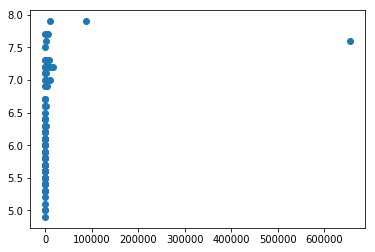

In [88]:
plt.scatter(Mw_China['Max_Deaths'], Mw_China['Mag_Value'])
plt.show()

In [89]:
Mw_China.sort_values('Mag_Value',ascending=False).head(25)

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
179,1931-08-10 21:18,China,46.571,89.965,35,7.9 Mw,NaN,7.9,Mw,POINT (89.965 46.57100000000001),10000.0
1308,2008-05-12 06:28,China,31.002,103.322,19,7.9 Mw,L,7.9,Mw,POINT (103.322 31.002),88287.0
12,1902-08-22 03:00,China,40.000,77.000,0,7.7 Mw,NaN,7.7,Mw,POINT (77 40),5650.0
329,1952-08-17 16:02,China,30.797,91.648,10,7.7 Mw,NaN,7.7,Mw,POINT (91.648 30.797),54.0
193,1932-12-25 02:04,China,39.771,96.690,25,7.6 Mw,NaN,7.6,Mw,POINT (96.69 39.771),275.0
583,1976-07-27 19:42,China,39.605,117.888,16.7,7.6 Mw,NaN,7.6,Mw,POINT (117.888 39.605),655237.0
347,1955-04-14 01:29,China,29.981,101.613,10,7.5 Mw,NaN,7.5,Mw,POINT (101.613 29.981),94.0
305,1949-02-23 16:08,China,41.000,83.500,0,7.3 Mw,NaN,7.3,Mw,POINT (83.5 41),12.0
198,1933-08-25 07:50,China,31.810,103.541,25,7.3 Mw,NaN,7.3,Mw,POINT (103.541 31.81),6865.0
90,1917-07-30 23:54,China,29.000,104.000,0,7.3 Mw,NaN,7.3,Mw,POINT (104 29),1879.0


In [90]:
#EQ3['Depth_km'] = pd.to_numeric(EQ3['Depth_km']) Unable to parse string "?" at position 412
EQ3.iloc[412]

UTC                  1963-06-26 04:17
Country                     Macedonia
lat                               NaN
lng                               NaN
Depth_km                            ?
Mag                            6.1 Mw
Secondary_Effects                 NaN
Mag_Value                         6.1
Mag_Units                          Mw
Geometry              POINT (nan nan)
Max_Deaths                       1100
Name: 413, dtype: object

In [91]:
EQ3['Depth_km'] = EQ3['Depth_km'].replace("?", np.nan)
EQ3.iloc[412]

UTC                  1963-06-26 04:17
Country                     Macedonia
lat                               NaN
lng                               NaN
Depth_km                          NaN
Mag                            6.1 Mw
Secondary_Effects                 NaN
Mag_Value                         6.1
Mag_Units                          Mw
Geometry              POINT (nan nan)
Max_Deaths                       1100
Name: 413, dtype: object

In [92]:
EQ3['Depth_km'] = pd.to_numeric(EQ3['Depth_km'])
EQ3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1339
Data columns (total 11 columns):
UTC                  1339 non-null object
Country              1339 non-null object
lat                  1324 non-null float64
lng                  1324 non-null float64
Depth_km             1249 non-null float64
Mag                  1339 non-null object
Secondary_Effects    373 non-null object
Mag_Value            1339 non-null float64
Mag_Units            1339 non-null object
Geometry             1339 non-null object
Max_Deaths           1339 non-null float64
dtypes: float64(5), object(6)
memory usage: 165.5+ KB


In [93]:
EQ3.sort_values('Depth_km',ascending=False).head(25)

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
501,1970-07-31 17:08,Colombia,-1.486,-72.563,644.6,8.0 Muk,NaN,8.0,Muk,POINT (-72.563 -1.486),1.0
970,1994-06-09 00:33,Bolivia,-13.860,-67.512,631.0,8.2 Mw,L,8.2,Mw,POINT (-67.512 -13.86),10.0
1242,2005-02-05 12:23,Philippines,5.321,123.338,522.1,7.1 Mw,NaN,7.1,Mw,POINT (123.338 5.321000000000001),2.0
738,1984-03-06 02:17,Japan,29.372,138.871,459.1,7.4 Mw,NaN,7.4,Mw,POINT (138.871 29.372),1.0
953,1993-10-11 15:54,Japan,32.030,137.926,351.0,6.9 Mw,NaN,6.9,Mw,POINT (137.926 32.03),1.0
95,1918-09-07 17:15,Russian Federation,46.812,150.253,242.4,7.6 mb,T,7.6,mb,POINT (150.253 46.812),24.0
1043,1998-02-20 12:18,Afghanistan,36.479,71.074,236.0,6.3 Mw,L,6.3,Mw,POINT (71.074 36.479),1.0
97,1919-05-06 19:40,Papua New Guinea,-5.477,152.629,232.8,7.6 mb,T,7.6,mb,POINT (152.629 -5.477),0.0
1103,2000-05-12 18:43,Argentina,-23.754,-66.777,225.0,7.2 Mw,NaN,7.2,Mw,POINT (-66.777 -23.754),1.0
1261,2005-12-12 21:47,Afghanistan,36.285,71.120,223.8,6.5 Mw,NaN,6.5,Mw,POINT (71.12 36.285),5.0


In [95]:
import seaborn as sns
g = sns.FacetGrid(EQ3, col='Country', hue='Country')
g.map(plt.plot, 'Mag_Value', 'Max_Deaths', marker="o", ms=4)
g.set(xticks=['Country'], yticks=[1000, 10000, 50000, 100000, 150000, 200000, 250000, 300000])

AttributeError: 'NoneType' object has no attribute 'seq'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10b6c9048> (for post_execute):


AttributeError: 'NoneType' object has no attribute 'seq'

AttributeError: 'NoneType' object has no attribute 'seq'

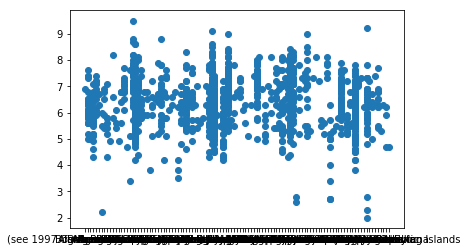

In [96]:
plt.scatter(EQ3['Country'], EQ3['Mag_Value'])

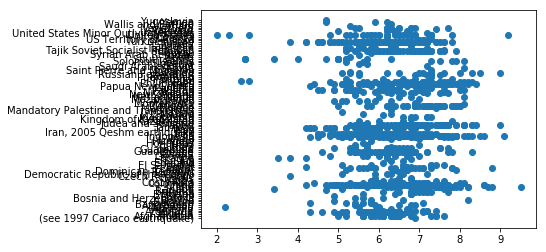

In [97]:
plt.scatter(EQ3['Mag_Value'], EQ3['Country'])

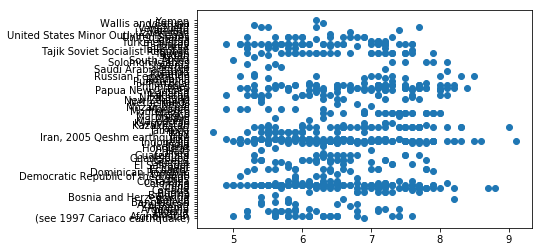

In [98]:
plt.scatter(Mw['Mag_Value'], Mw['Country'])

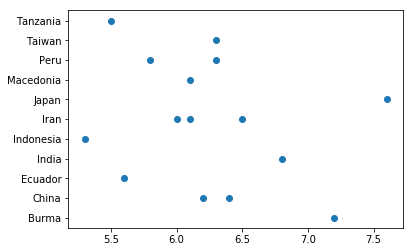

In [99]:
Mw_top5 = Mw.sort_values('Depth_km',ascending=False).head(15)
plt.scatter(Mw_top5['Mag_Value'], Mw_top5['Country'])

In [100]:
Mw_top5

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
413,1963-06-26 04:17,Macedonia,NaN,NaN,?,6.1 Mw,NaN,6.1,Mw,POINT (nan nan),1100.0
1231,2004-09-15 08:35,Indonesia,-8.784,115.325,96.7,5.3 Mw,NaN,5.3,Mw,POINT (115.325 -8.783999999999999),1.0
987,1995-03-26 15:12,Ecuador,-2.133,-79.509,95.5,5.6 Mw,NaN,5.6,Mw,POINT (-79.509 -2.133),1.0
937,1993-01-15 11:06,Japan,43.022,144.194,94.8,7.6 Mw,L,7.6,Mw,POINT (144.194 43.022),2.0
696,1982-03-28 23:24,Peru,-12.743,-76.010,90.8,6.3 Mw,NaN,6.3,Mw,POINT (-76.01000000000001 -12.743),3.0
822,1988-08-06 00:36,Burma,25.105,95.126,90.5,7.2 Mw,L,7.2,Mw,POINT (95.126 25.105),35.0
632,1979-01-16 09:50,Iran,33.909,59.471,9.9,6.5 Mw,NaN,6.5,Mw,POINT (59.471 33.909),200.0
1161,2002-05-18 15:15,Tanzania,-2.919,33.738,9.8,5.5 Mw,NaN,5.5,Mw,POINT (33.738 -2.919),2.0
1023,1997-02-28 12:57,Iran,38.108,48.069,9.7,6.1 Mw,NaN,6.1,Mw,POINT (48.069 38.108),1100.0
1139,2001-08-09 02:06,Peru,-14.348,-72.680,9.6,5.8 Mw,NaN,5.8,Mw,POINT (-72.68000000000001 -14.348),4.0


In [101]:
EQ3_Mag_top5 = EQ3.sort_values('Mag_Value',ascending=False).head(5)
EQ3_Death_top5 = EQ3.sort_values('Max_Deaths',ascending=False).head(5)
EQ3_Depth_km_top5 = EQ3.sort_values('Depth_km',ascending=False).head(5)

In [102]:
EQ3_Mag_top5

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
396,1960-05-22 19:11,Chile,-38.235,-73.047,35.0,9.5 Muk,T,9.5,Muk,POINT (-73.047 -38.235),6000.0
416,1964-03-28 03:36,United States,61.017,-147.648,6.6,9.2 Muk,T,9.2,Muk,POINT (-147.648 61.017),131.0
1238,2004-12-26 00:58,Indonesia,3.287,95.972,30.0,9.1 Mw,"T,L",9.1,Mw,POINT (95.97200000000001 3.287),297200.0
1335,2011-03-11 14:46,Japan,38.322,142.369,24.4,9.0 Mw,T,9.0,Mw,POINT (142.369 38.322),15894.0
332,1952-11-04 16:58,Russian Federation,52.755,160.057,22.2,9.0 Muk,T,9.0,Muk,POINT (160.057 52.755),0.0


In [103]:
EQ3_Death_top5

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
583,1976-07-27 19:42,China,39.605,117.888,16.7,7.6 Mw,NaN,7.6,Mw,POINT (117.888 39.605),655237.0
1238,2004-12-26 00:58,Indonesia,3.287,95.972,30.0,9.1 Mw,"T,L",9.1,Mw,POINT (95.97200000000001 3.287),297200.0
102,1920-12-16 12:05,China,36.601,105.317,25.0,8.6 Ms,NaN,8.6,Ms,POINT (105.317 36.601),235502.0
1328,2010-01-12 17:00,Haiti,18.457,-72.533,13.0,7.0 Mw,NaN,7.0,Mw,POINT (-72.533 18.457),222517.0
140,1927-05-22 22:32,China,37.386,102.311,25.0,7.9 Ms,NaN,7.9,Ms,POINT (102.311 37.386),200000.0


In [104]:
EQ3_Depth_km_top5

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths
501,1970-07-31 17:08,Colombia,-1.486,-72.563,644.6,8.0 Muk,NaN,8.0,Muk,POINT (-72.563 -1.486),1.0
970,1994-06-09 00:33,Bolivia,-13.860,-67.512,631.0,8.2 Mw,L,8.2,Mw,POINT (-67.512 -13.86),10.0
1242,2005-02-05 12:23,Philippines,5.321,123.338,522.1,7.1 Mw,NaN,7.1,Mw,POINT (123.338 5.321000000000001),2.0
738,1984-03-06 02:17,Japan,29.372,138.871,459.1,7.4 Mw,NaN,7.4,Mw,POINT (138.871 29.372),1.0
953,1993-10-11 15:54,Japan,32.030,137.926,351.0,6.9 Mw,NaN,6.9,Mw,POINT (137.926 32.03),1.0


In [105]:
Top_5=pd.merge(EQ3_Mag_top5, EQ3_Death_top5,  on=['UTC', 'Country'])
Top_5

,UTC,Country,lat_x,lng_x,Depth_km_x,Mag_x,Secondary_Effects_x,Mag_Value_x,Mag_Units_x,Geometry_x,Max_Deaths_x,lat_y,lng_y,Depth_km_y,Mag_y,Secondary_Effects_y,Mag_Value_y,Mag_Units_y,Geometry_y,Max_Deaths_y
0,2004-12-26 00:58,Indonesia,3.287,95.972,30.0,9.1 Mw,"T,L",9.1,Mw,POINT (95.97200000000001 3.287),297200.0,3.287,95.972,30.0,9.1 Mw,"T,L",9.1,Mw,POINT (95.97200000000001 3.287),297200.0


In [106]:
EQ_frequency = EQ3['Country'].value_counts()
EQ_frequency=EQ_frequency.to_frame()
EQ_frequency.columns=['Frequency']
EQ_frequency.head()

,Frequency
China,166
Indonesia,96
Turkey,95
Iran,91
Japan,82


In [107]:
EQ_frequency.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, China to Judea and Samaria
Data columns (total 1 columns):
Frequency    109 non-null int64
dtypes: int64(1)
memory usage: 1.7+ KB


(array([ 41.,   0.,   0.,   3.,  11.,  11.,   4.,  11.,  10.,  18.]),
 array([  0. ,   3.2,   6.4,   9.6,  12.8,  16. ,  19.2,  22.4,  25.6,
         28.8,  32. ]),
 <a list of 10 Patch objects>)

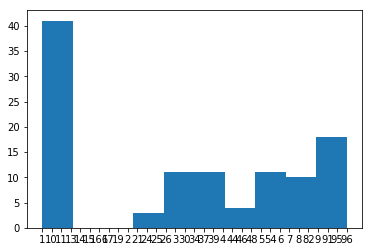

In [108]:
plt.hist(EQ_frequency)

In [114]:
crs = {"init": "epsg:4326"}
EQ3_gdf = gpd.GeoDataFrame(EQ3, crs=crs, geometry=geometry)

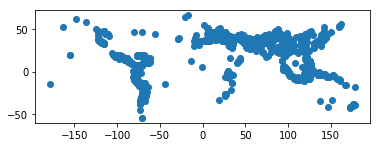

In [110]:
EQ3_gdf.plot()

In [116]:
countries_df = gpd.read_file('data/countries.geojson')
countries_df.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,POLYGON ((-69.99693762899992 12.57758209800004...
1,Afghanistan,AFG,"POLYGON ((71.04980228700009 38.40866445000009,..."
2,Angola,AGO,(POLYGON ((11.73751945100014 -16.6925779829998...
3,Anguilla,AIA,(POLYGON ((-63.03766842399995 18.2129580750000...
4,Albania,ALB,"POLYGON ((19.74776574700007 42.57890085900007,..."


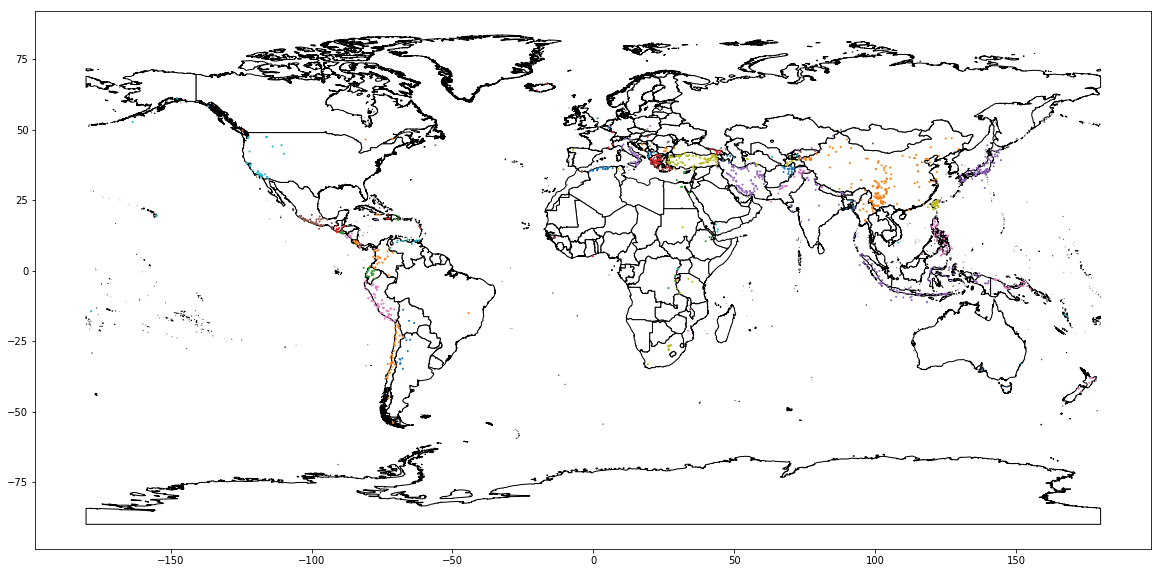

In [117]:
countries = countries_df.plot(color='white', edgecolor='black', figsize = (20, 20))

EQ3_gdf.plot(ax=countries, markersize=1, figsize=(20, 20), column='Country', label=True)

In [118]:
#Grab DataFrame rows where column has certain values has a null value
Mw[Mw.Geometry.isnull()]

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,Mag_Value,Mag_Units,Geometry,Max_Deaths


In [119]:
Mw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 2 to 1339
Data columns (total 11 columns):
UTC                  822 non-null object
Country              822 non-null object
lat                  808 non-null float64
lng                  808 non-null float64
Depth_km             808 non-null object
Mag                  822 non-null object
Secondary_Effects    304 non-null object
Mag_Value            822 non-null float64
Mag_Units            822 non-null object
Geometry             822 non-null object
Max_Deaths           822 non-null float64
dtypes: float64(4), object(7)
memory usage: 117.1+ KB


In [121]:
Mw['Geometry'].value_counts()

POINT (100.278 36.059)                2
POINT (-71 -54)                       2
POINT (49.582 36.826)                 1
POINT (13.901 41.755)                 1
POINT (-13.511 11.862)                1
POINT (-9.5 30.5)                     1
POINT (-71.167 -30.878)               1
POINT (118.359 39.723)                1
POINT (117.243 23.54)                 1
POINT (103.865 34.713)                1
POINT (151.895 -5.446000000000001)    1
POINT (-121.728 37.712)               1
POINT (20.813 39.382)                 1
POINT (-103.632 19.452)               1
POINT (119.658 -3.773)                1
POINT (44.118 40.919)                 1
POINT (72.929 39.351)                 1
POINT (99.681 22.909)                 1
POINT (100.994 38.371)                1
POINT (122.695 24.307)                1
POINT (139.294 34.803)                1
POINT (-101.623 17.831)               1
POINT (115.204 35.223)                1
POINT (-74.79899999999999 2.889)      1
POINT (12.781 43.078)                 1
